In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lercheeyi/mLPC-GA2V2/main/crop%20yield%20prediction%20using%20machine%20learning.csv"
df = pd.read_csv(url)

# 4.1 Initial EDA


In [ ]:
#check for missing value
print(df.isnull().sum())

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Temperature       0
humidity          0
soil moisture     0
 area             0
Production       59
yield             0
dtype: int64


In [ ]:
# Remove rows with null values
df = df.dropna()
print(df.isnull().sum())

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Temperature      0
humidity         0
soil moisture    0
 area            0
Production       0
yield            0
dtype: int64


In [ ]:

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 3180


In [ ]:
# Drop the duplicate rows
df.drop_duplicates(inplace=True)

# Recalculate duplicate rows (optional)
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 0


In [ ]:
import numpy as np

# Check for outliers in the original DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns

print("Outliers in the original DataFrame:")
for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    print(f"Outliers in {column}: {outliers_count} ({(outliers_count/df.shape[0])*100:.2f}%)")


Outliers in the original DataFrame:
Outliers in Crop_Year: 0 (0.00%)
Outliers in Temperature: 523 (11.15%)
Outliers in humidity: 0 (0.00%)
Outliers in soil moisture: 0 (0.00%)
Outliers in  area: 760 (16.20%)
Outliers in Production: 822 (17.53%)
Outliers in yield: 656 (13.99%)


In [ ]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers_iqr(df, numerical_cols):
    df_cleaned = df.copy()
    for column in numerical_cols:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned


# Apply the function to the dataset
df_cleaned = remove_outliers_iqr(df, numerical_cols)

In [ ]:
# Check for outliers in the cleaned DataFrame
print("\nOutliers in the cleaned DataFrame:")
for column in numerical_cols:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)].shape[0]
    print(f"Outliers in {column}: {outliers_count} ({(outliers_count/df_cleaned.shape[0])*100:.2f}%)")



Outliers in the cleaned DataFrame:
Outliers in Crop_Year: 0 (0.00%)
Outliers in Temperature: 0 (0.00%)
Outliers in humidity: 0 (0.00%)
Outliers in soil moisture: 0 (0.00%)
Outliers in  area: 234 (9.02%)
Outliers in Production: 333 (12.84%)
Outliers in yield: 221 (8.52%)


In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Apply the function to the dataset
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Print the shape of the dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", df_cleaned.shape)

Shape of dataset before removing outliers: (4690, 11)
Shape of dataset after removing outliers: (2594, 11)


In [ ]:
#target encoding
df_encoded = df.copy()

target_column = 'yield'
# Apply target encoding to the remaining categorical columns
for col in ['Season', 'Crop']:
    # Calculate the mean yield for each category
    category_means = df.groupby(col)[target_column].mean()

    # Map the mean values to the dataframe
    df_encoded[col] = df[col].map(category_means)

# Display the first few rows of the updated encoded dataframe
df_encoded.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,humidity,soil moisture,area,Production,yield
0,Andhra Pradesh,EAST GODAVARI,2001,5.598642,1.918000,36.0,35.0,45.0,310.0,461.0,1.49
1,Andhra Pradesh,EAST GODAVARI,2001,5.598642,8.302917,37.0,40.0,46.0,988.0,3824.0,3.87
2,Andhra Pradesh,EAST GODAVARI,2001,5.598642,5.114917,36.0,41.0,50.0,755.0,2500.0,3.31
3,Andhra Pradesh,EAST GODAVARI,2001,5.598642,7.745000,37.0,42.0,55.0,15820.0,191027.0,12.08
4,Andhra Pradesh,EAST GODAVARI,2001,5.598642,0.484328,36.0,40.0,54.0,483.0,324.0,0.67


In [ ]:
# Split the data into features (X) and target variable (y)
X = df_encoded.drop(['State_Name', 'District_Name','yield'],axis=1)
y = df_encoded['yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


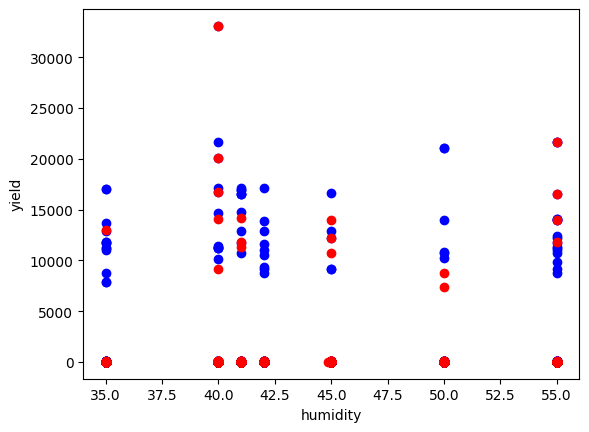

In [ ]:
import matplotlib.pyplot as plt #  library used for creating plots and visualizations
plt.scatter(X_train['humidity'], y_train, color='blue')
plt.scatter(X_test['humidity'], y_test, color='red')
plt.xlabel("humidity")
plt.ylabel("yield")
plt.show()

In [ ]:
# @title 4.1.4 Feature Selection (only on training set)
# Initialize the model
model = LinearRegression()

# Initialize RFE with the model and number of features to select
rfe = RFE(model, n_features_to_select=200)

# Fit RFE on the training data
rfe = rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['Crop_Year', 'Season', 'Crop', 'Temperature', 'humidity',
       'soil moisture', ' area', 'Production'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=200 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


# 4.2 Descriptive EDA



## 4.2.1 Data Exploration

### 4.2.1.1 Data Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4690 entries, 0 to 7928
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     4690 non-null   object 
 1   District_Name  4690 non-null   object 
 2   Crop_Year      4690 non-null   int64  
 3   Season         4690 non-null   object 
 4   Crop           4690 non-null   object 
 5   Temperature    4690 non-null   float64
 6   humidity       4690 non-null   float64
 7   soil moisture  4690 non-null   float64
 8    area          4690 non-null   float64
 9   Production     4690 non-null   float64
 10  yield          4690 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 439.7+ KB


### 4.2.1.2 Summary Statistics

In [ ]:
df.describe().round(2)

,Crop_Year,Temperature,humidity,soil moisture,area,Production,yield
count,4690.00,4690.00,4690.00,4690.00,4690.00,4.690000e+03,4690.00
mean,2010.37,34.44,44.79,53.12,15411.49,3.471892e+06,271.75
std,5.99,3.50,6.67,5.26,42941.69,4.194283e+07,1988.50
min,2001.00,25.00,35.00,45.00,1.00,0.000000e+00,0.00
25%,2005.00,34.00,40.00,50.00,190.00,2.012500e+02,0.58
50%,2011.00,36.00,42.00,54.00,1101.50,2.086000e+03,1.74
75%,2015.00,36.00,50.00,55.00,7140.00,1.664900e+04,5.05
max,2020.00,37.00,55.00,62.00,409286.00,7.801620e+08,33089.01


In [ ]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns].describe()


,State_Name,District_Name,Season,Crop
count,4690,4690,4690,4690
unique,1,6,3,66
top,Andhra Pradesh,PRAKASAM,Kharif,Rice
freq,4690,1078,1973,251


## 4.2.2 Data Visualization

### 4.2.2.1 Distribution of Categorical Features

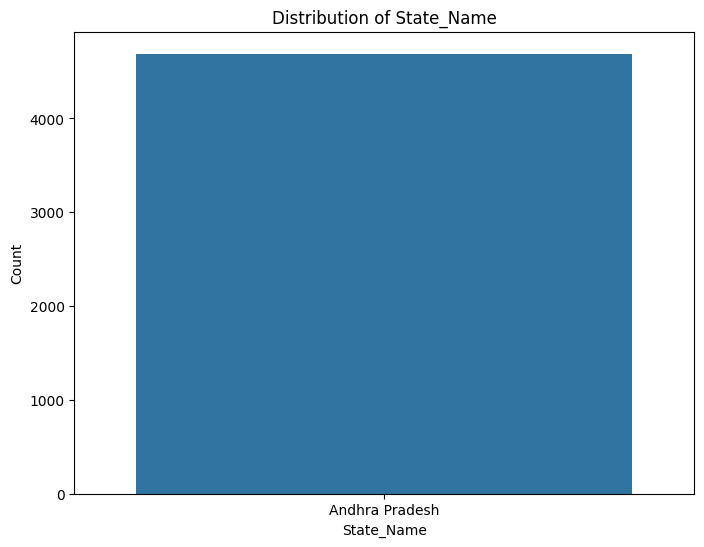

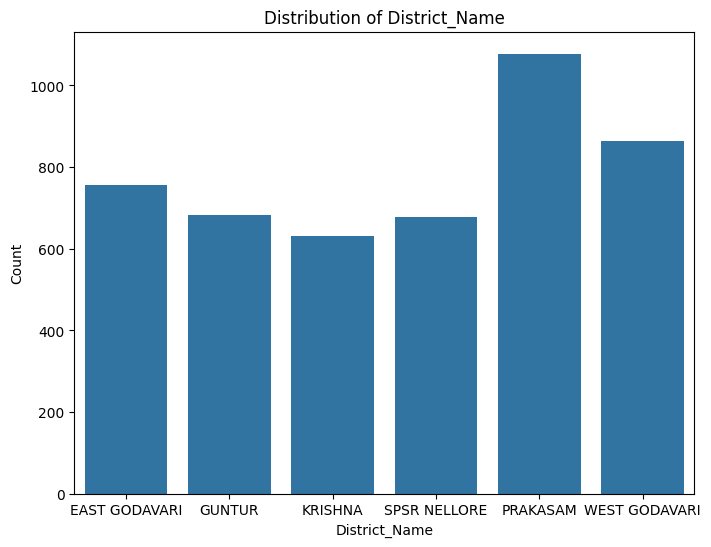

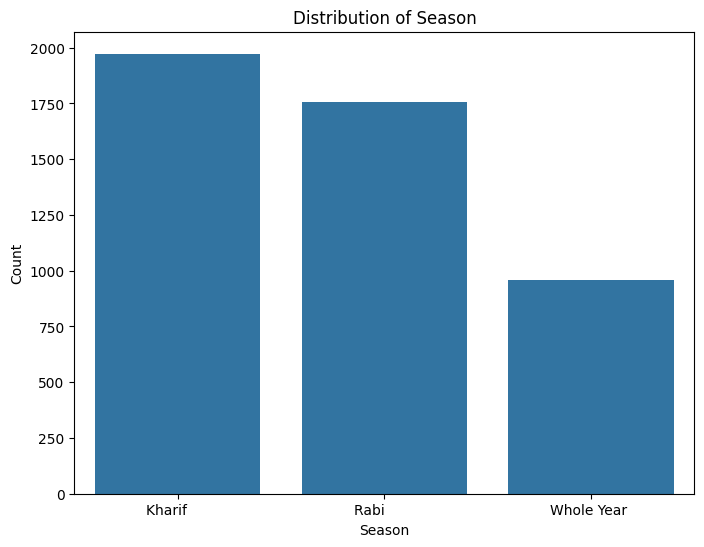

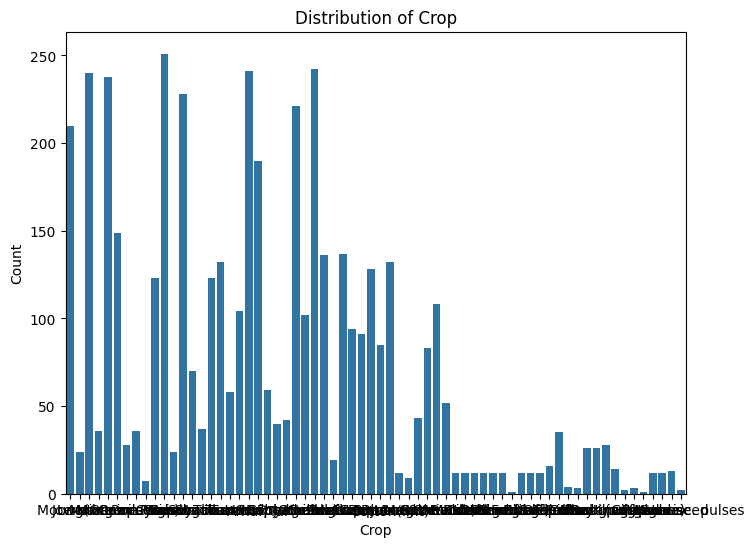

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### 4.2.2.2 Distribution of Numerical Features

In [ ]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

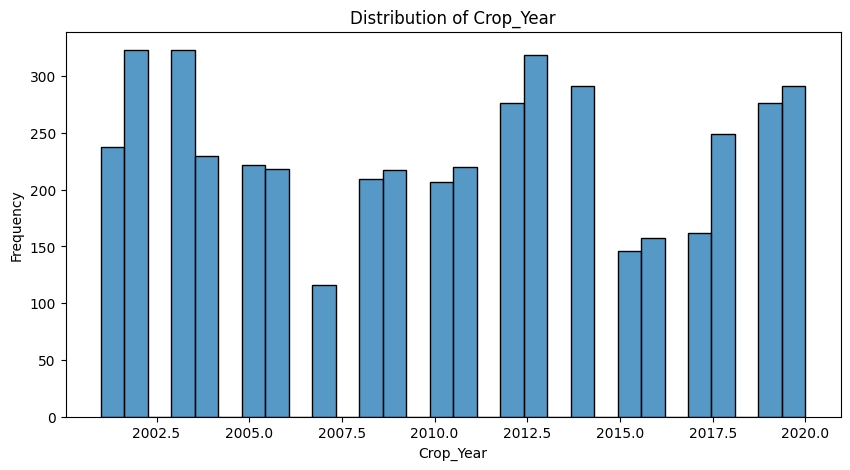

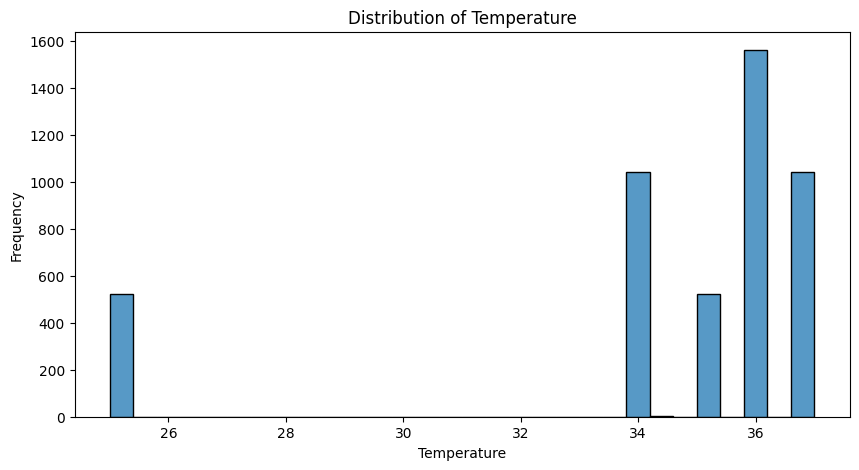

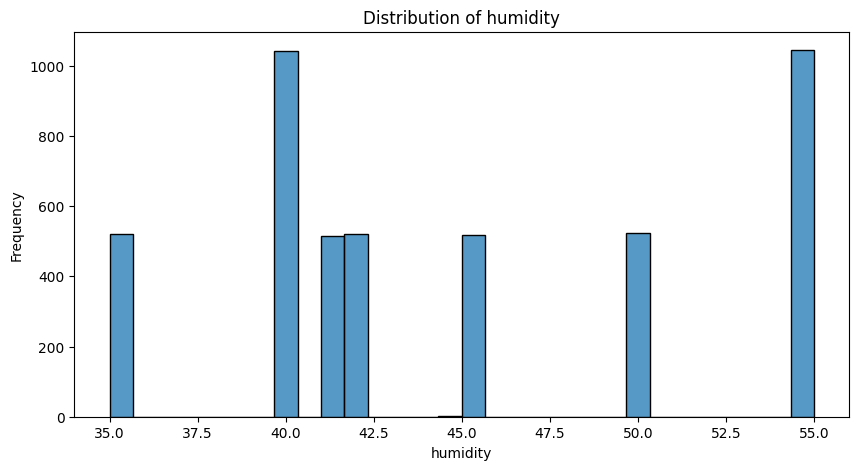

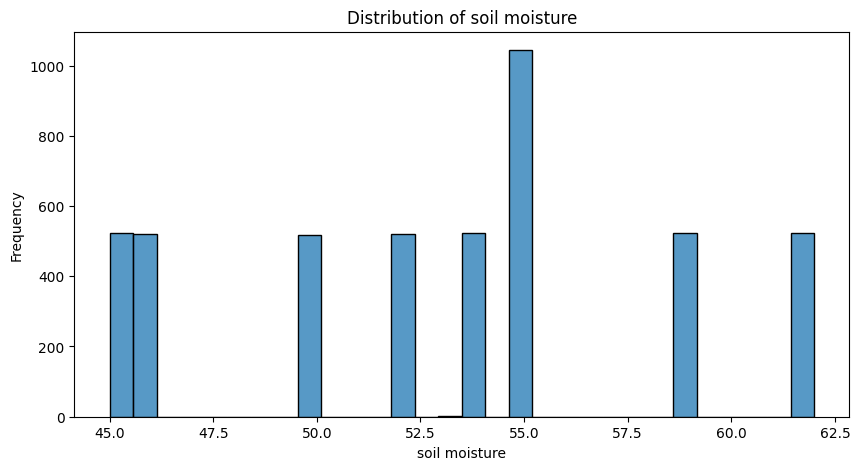

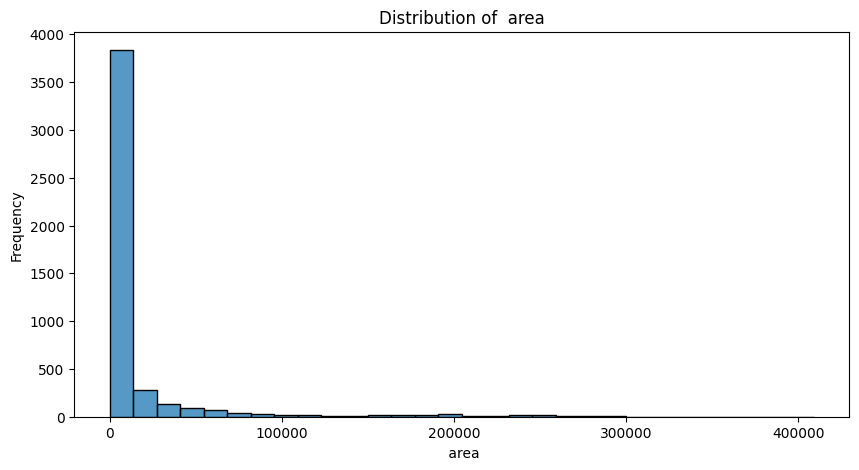

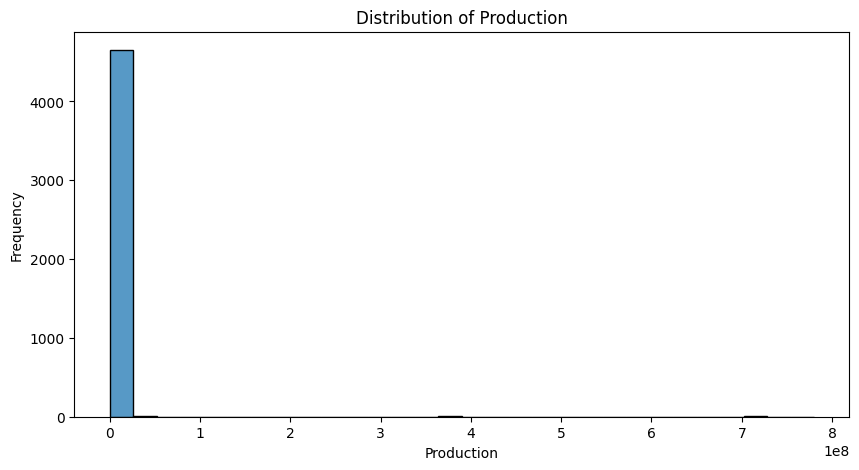

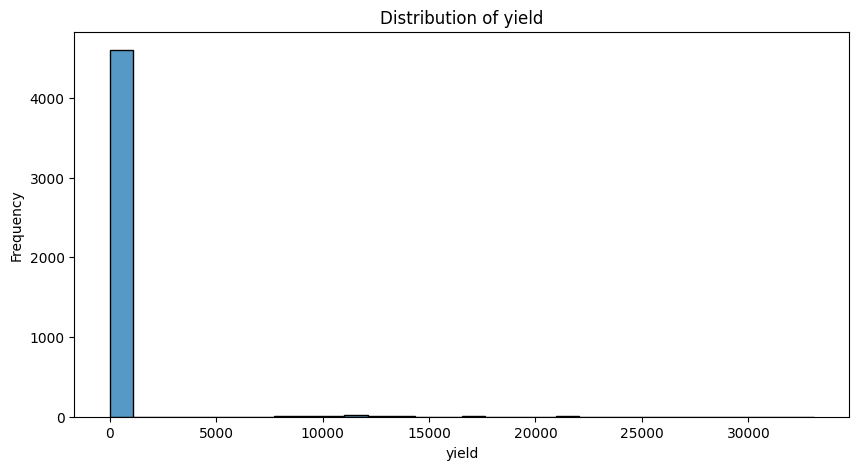

In [ ]:
# Plot histograms for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

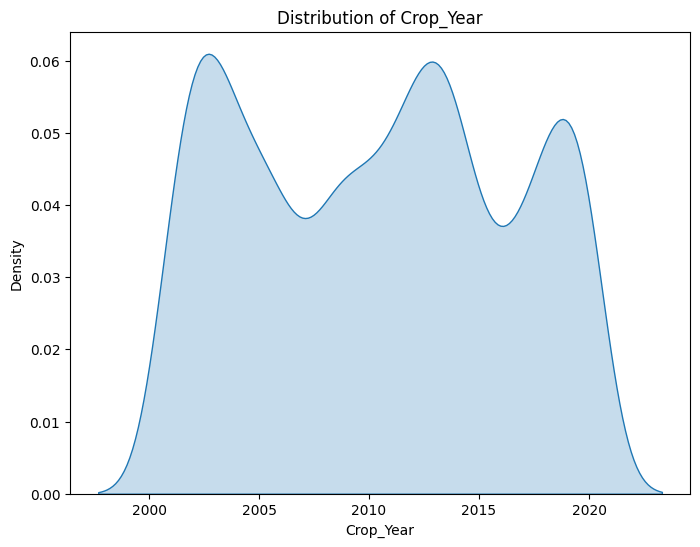

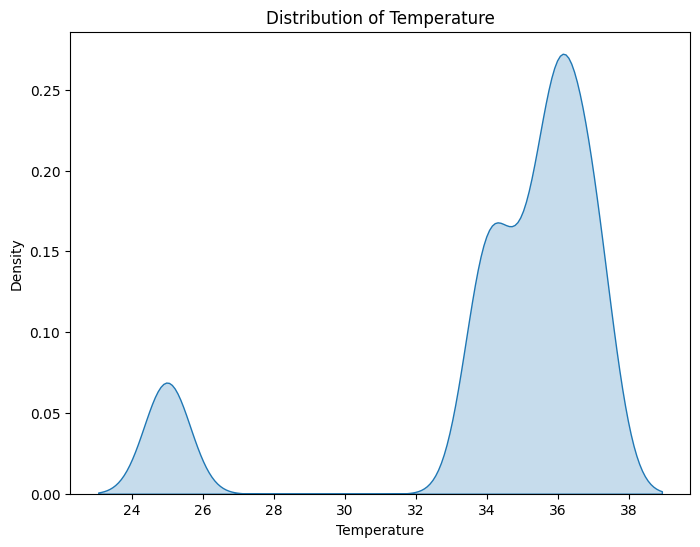

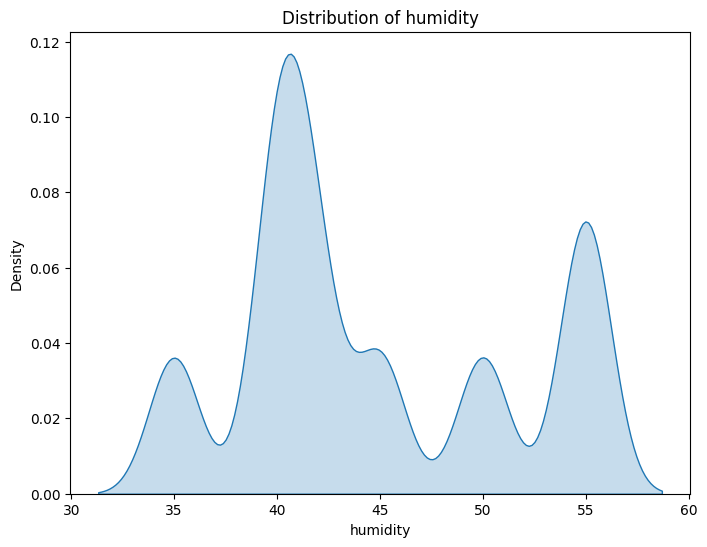

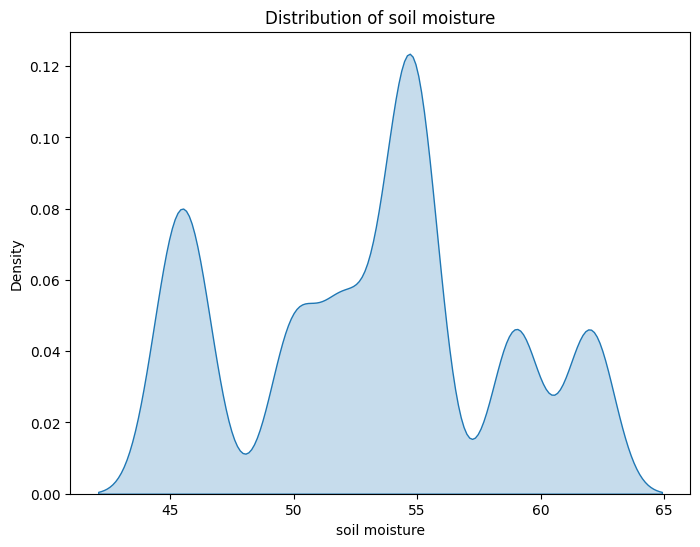

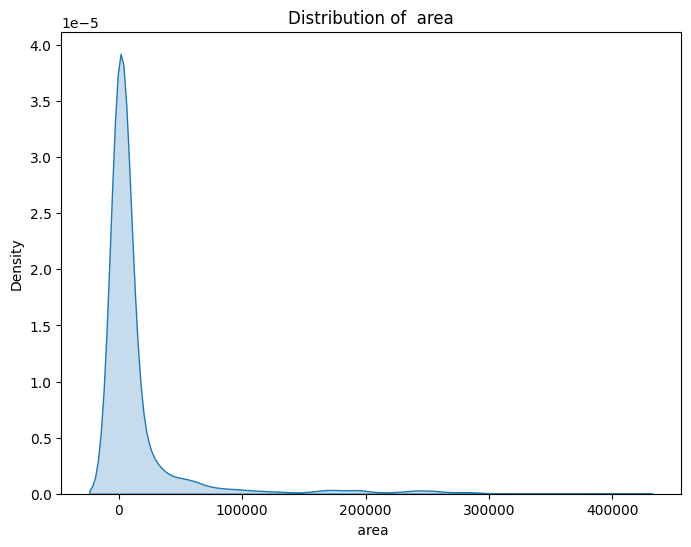

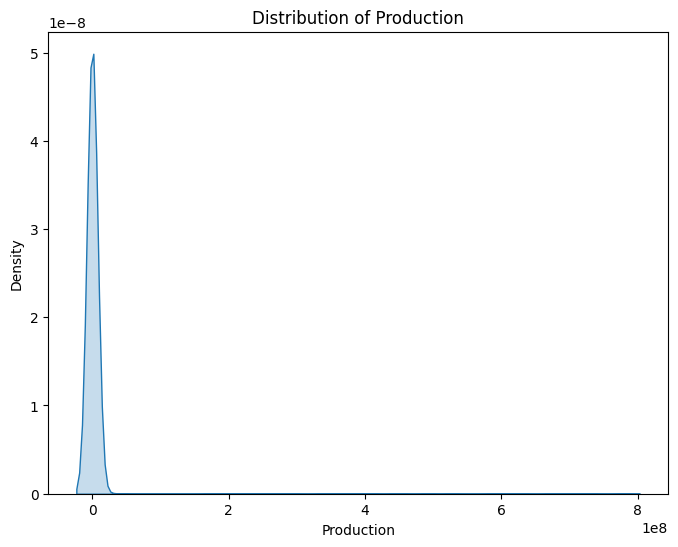

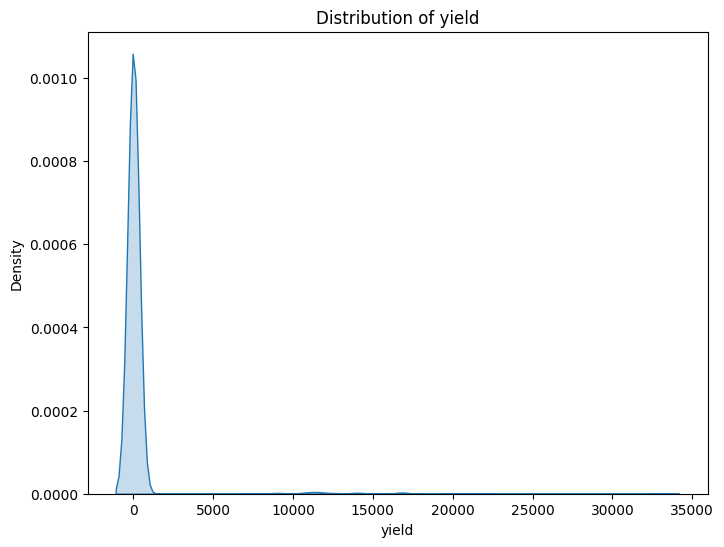

In [ ]:
# Plot KDE for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

### 4.2.2.3 Box Plots for Outliers


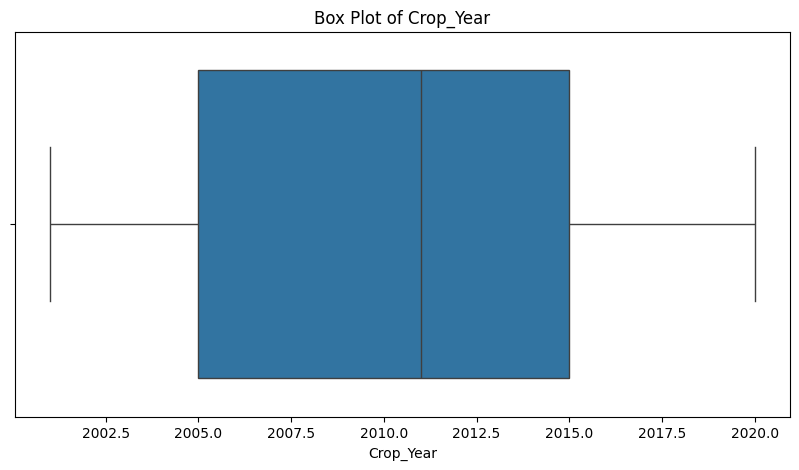

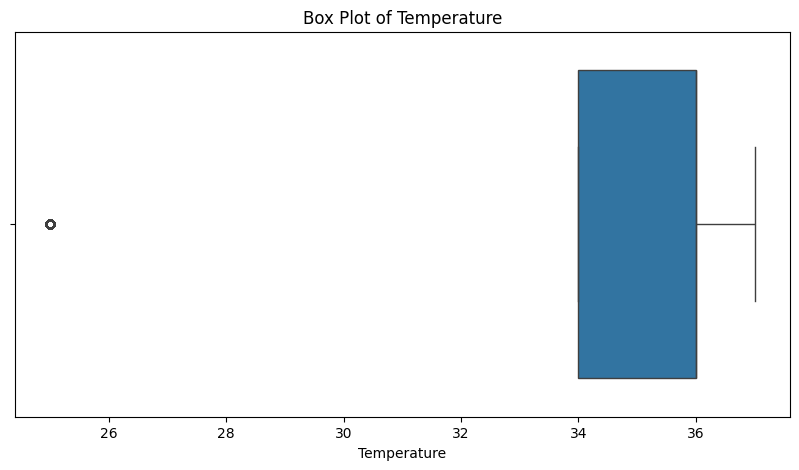

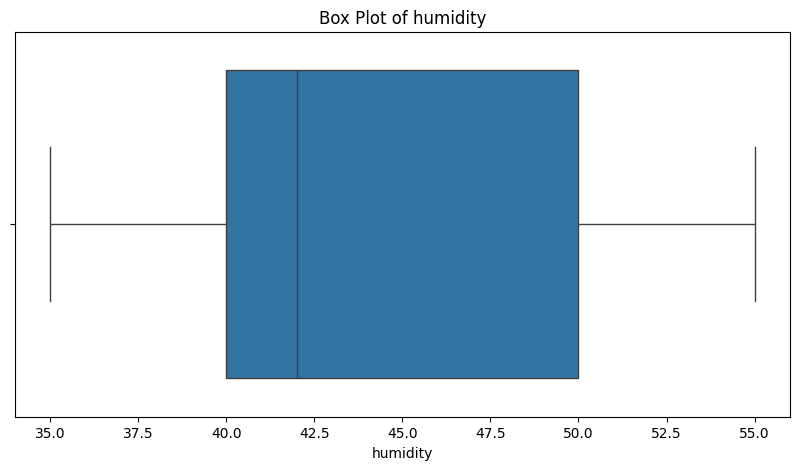

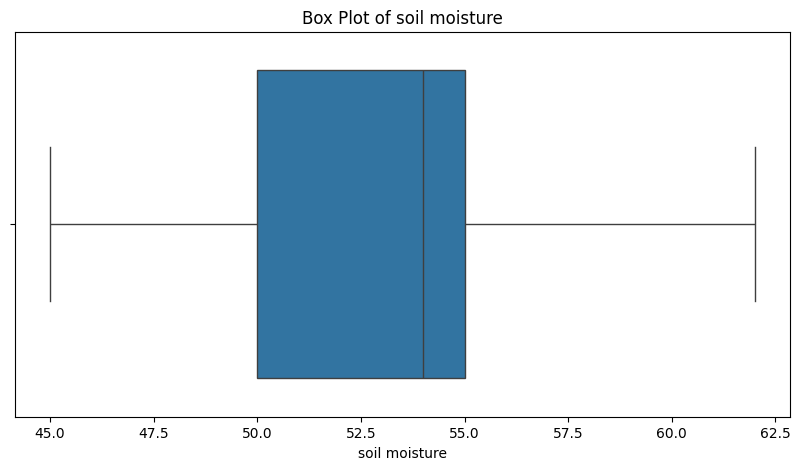

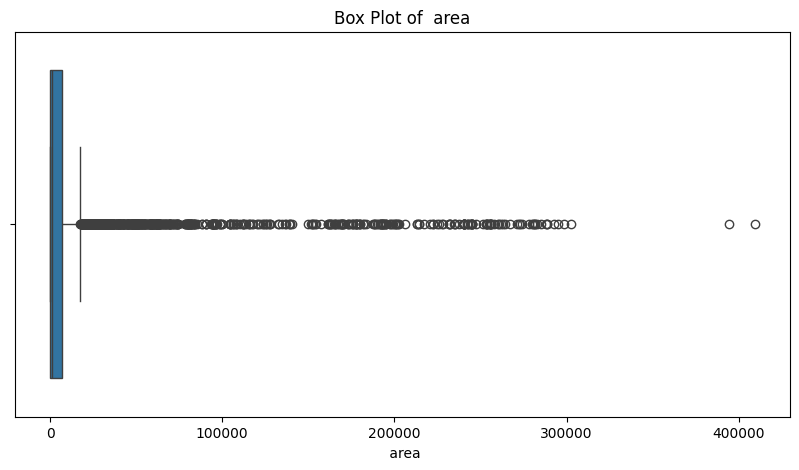

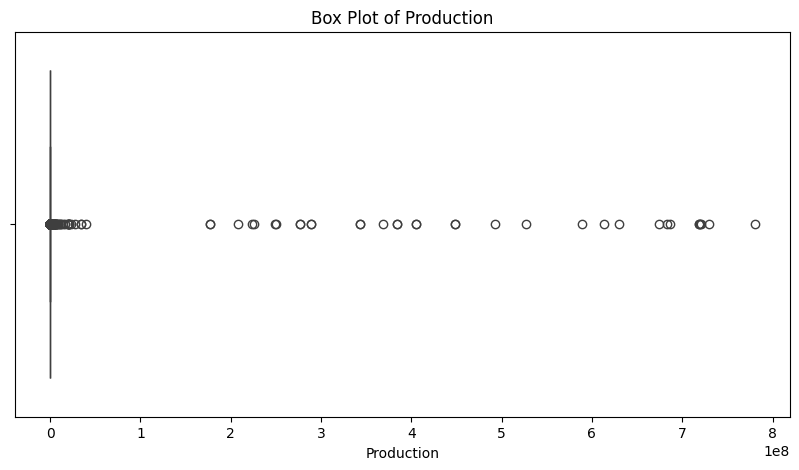

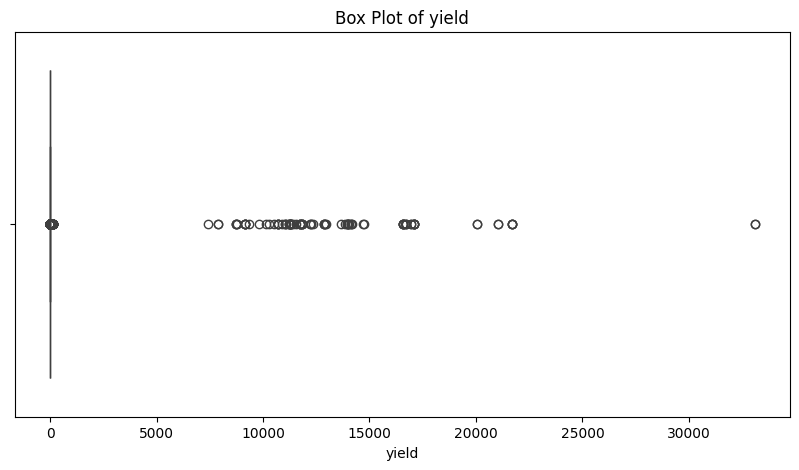

In [ ]:
# Plot box plots for each numerical feature
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
# Explain purposes // will delete later
Q1 = df[numerical_columns].quantile(0.25) # Calculate quantiles on the DataFrame, not the Index
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Crop_Year          0
Temperature      523
humidity           0
soil moisture      0
 area            760
Production       822
yield            656
dtype: int64


### 4.2.2.4 Correlation Matrix


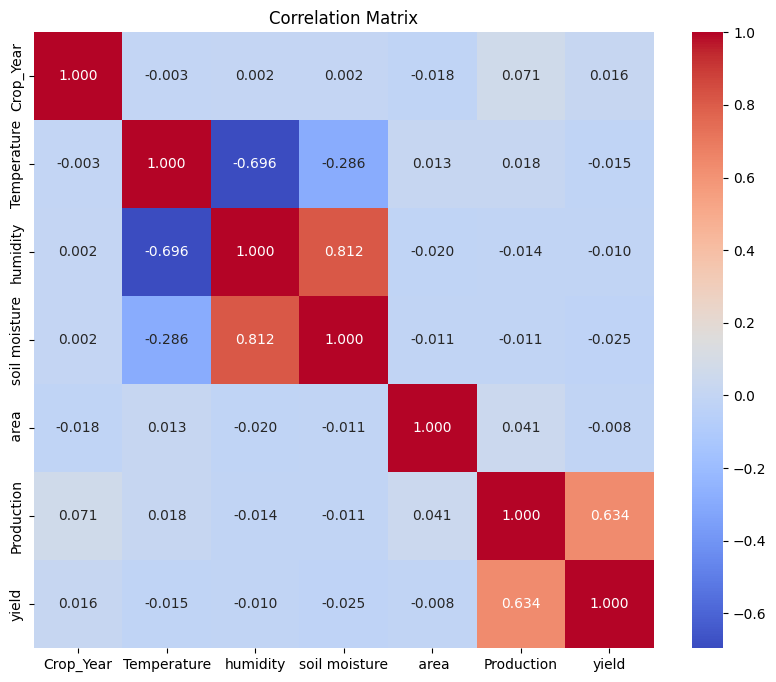

In [ ]:
corr_matrix =  df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

# Models

## Linear Regression

### Baseline Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
LR_model = LinearRegression()

# Fit the model to the training data
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Make predictions on the training set
y_train_pred_LR = LR_model.predict(X_train)

#Evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred_LR)
mse = mean_squared_error(y_train, y_train_pred_LR)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred_LR)

print("Mean absolute error: %.2f" %mae)
print("(MSE): %.2f" %mse)
print(" (RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 76.72
(MSE): 307836.35
 (RMSE): 554.83
R2-score: 0.92


In [ ]:
# Make predictions on the test set
y_test_pred_LR = LR_model.predict(X_test)

#Evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred_LR)
mse = mean_squared_error(y_test, y_test_pred_LR)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred_LR)

print("Mean absolute error: %.2f" %mae)
print("(MSE): %.2f" %mse)
print(" (RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 91.50
(MSE): 552041.00
 (RMSE): 742.99
R2-score: 0.88


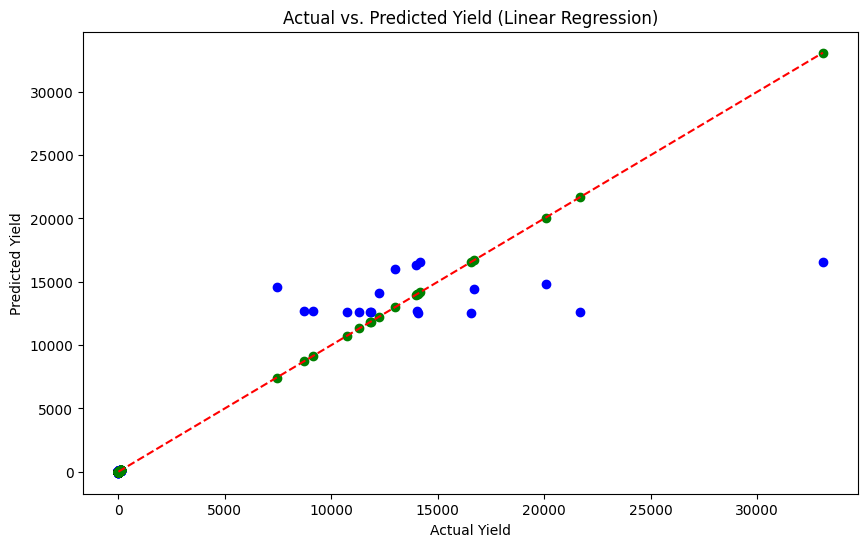

In [ ]:
import matplotlib.pyplot as plt
# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_LR,color='blue', label = 'Predicted')
plt.scatter(y_test, y_test, color='green', label = 'Actual')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (Linear Regression)')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()


### With Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Linear Regression model
LR_model_hyper = LinearRegression()

# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(LR_model_hyper, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
# Make predictions on the training set
y_train_pred_LR_hyper = best_model.predict(X_train)

#Evaluation metrics
mae = mean_absolute_error(y_train, y_train_pred_LR_hyper)
mse = mean_squared_error(y_train, y_train_pred_LR_hyper)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred_LR_hyper)

print("Mean absolute error: %.2f" %mae)
print("(MSE): %.2f" %mse)
print(" (RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

# Make predictions on the test set
y_test_pred_LR_hyper = best_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred_LR_hyper)
mse = mean_squared_error(y_test, y_test_pred_LR_hyper)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred_LR_hyper)

print("Mean absolute error: %.2f" % mae)
print("(MSE): %.2f" % mse)
print(" (RMSE): %.2f" % rmse)
print("R2-score: %.2f" % r2)


Best Hyperparameters: {'fit_intercept': False, 'positive': True}
Mean absolute error: 60.50
(MSE): 308399.25
 (RMSE): 555.34
R2-score: 0.92
Mean absolute error: 74.90
(MSE): 552463.38
 (RMSE): 743.28
R2-score: 0.88


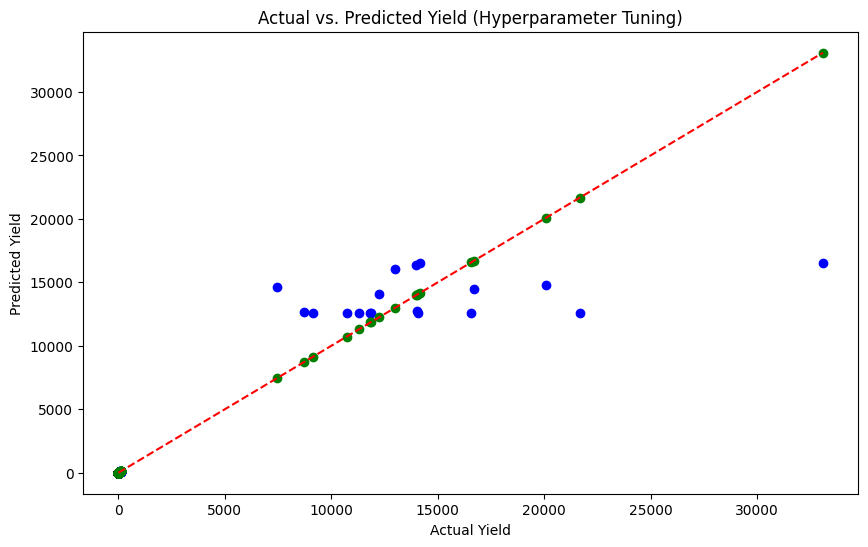

In [ ]:
import matplotlib.pyplot as plt
# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_LR_hyper,color='blue', label = 'Predicted')
plt.scatter(y_test, y_test, color='green', label = 'Actual')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (Hyperparameter Tuning)')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()

### With RobustScaler

In [ ]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
LR_model_robust = LinearRegression()

# Fit the model to the scaled training data
LR_model_robust.fit(X_train_scaled, y_train)

# Make predictions on the scaled tra set
y_train_pred_LR_robust = LR_model_robust.predict(X_train_scaled)

# Make predictions on the scaled test set
y_test_pred_LR_robust = LR_model_robust.predict(X_test_scaled)

In [ ]:
#Evaluation Metrics Training Set
print('Training Set Evaluation')
mae = mean_absolute_error(y_train, y_train_pred_LR_robust)
mse = mean_squared_error(y_train, y_train_pred_LR_robust)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred_LR_robust)

print("Mean absolute error: %.2f" % mae)
print("(MSE): %.2f" % mse)
print(" (RMSE): %.2f" % rmse)
print("R2-score: %.2f" % r2)

# Evaluation metrics Testing Set
mae = mean_absolute_error(y_test, y_test_pred_LR_robust)
mse = mean_squared_error(y_test, y_test_pred_LR_robust)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred_LR_robust)

print('Testing Set Evaluation')
print("Mean absolute error: %.2f" % mae)
print("(MSE): %.2f" % mse)
print(" (RMSE): %.2f" % rmse)
print("R2-score: %.2f" % r2)

Training Set Evaluation
Mean absolute error: 76.72
(MSE): 307836.35
 (RMSE): 554.83
R2-score: 0.92
Testing Set Evaluation
Mean absolute error: 91.50
(MSE): 552041.00
 (RMSE): 742.99
R2-score: 0.88


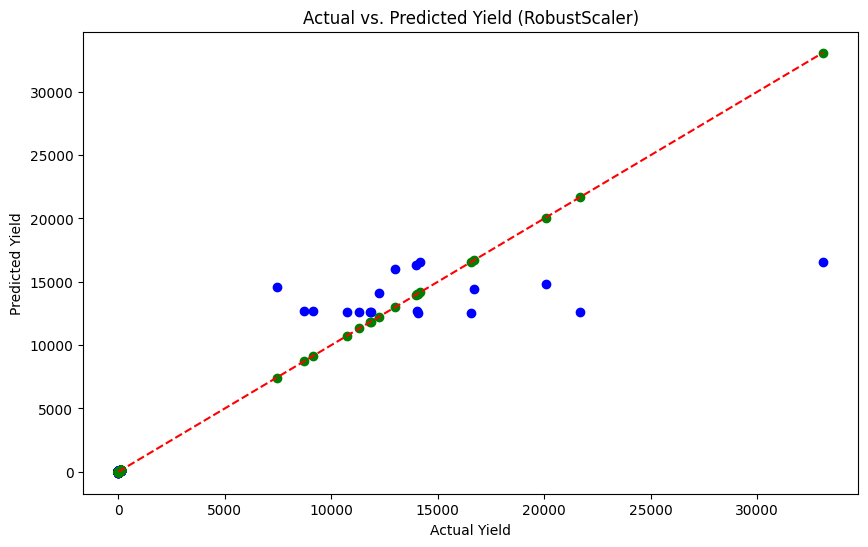

In [ ]:
import matplotlib.pyplot as plt
# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_LR_robust, color='blue', label = 'Predicted')
plt.scatter(y_test, y_test, color='green', label = 'Actual')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (RobustScaler)')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()

##Lasso Regression Model

### Baseline Model

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_model = Lasso(alpha=1.0, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

Lasso(random_state=42)

In [ ]:
# Make predictions on the training set
y_pred = lr_model.predict(X_train)

#Evaluation parameters
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print("Mean absolute error: %.2f" %mae)
print("(MSE): %.2f" %mse)
print(" (RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 75.71
(MSE): 307838.16
 (RMSE): 554.83
R2-score: 0.92


In [ ]:
# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

#Evaluation parameters
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error: %.2f" %mae)
print("(MSE): %.2f" %mse)
print(" (RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 90.47
(MSE): 552006.49
 (RMSE): 742.97
R2-score: 0.88


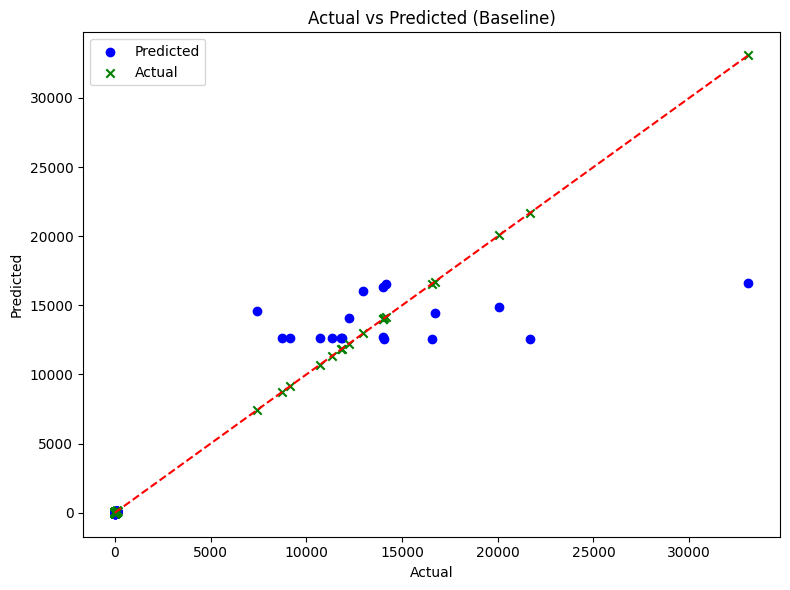

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Now create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Predicted values in blue
plt.scatter(y_test, y_test, color='green', label='Actual', marker='x')  # Actual values in green with a different marker
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Baseline)')
plt.legend()
plt.tight_layout()
plt.show()

### With Hyperparameter

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator (model with best parameters)
best_estimator = grid_search.best_estimator_

# Evaluate the model for train set
y_train_pred = best_estimator.predict(X_train)

#Evaluation parameters
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

print("(MAE): %.2f" %mae)
print("(MSE): %.2f" %mse)
print("(RMSE): %.2f" %rmse)
print("(R2-score): %.2f" %r2)

# Evaluate the model for test set
y_pred = best_estimator.predict(X_test)

#Evaluation the best model on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("/")
print("Mean absolute error (MAE): %.2f" %mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2-score:", r2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'alpha': 100}
(MAE): 63.20
(MSE): 308340.74
(RMSE): 555.28
(R2-score): 0.92
/
Mean absolute error (MAE): 77.59
Mean Squared Error (MSE): 552223.4397644672
Root Mean Squared Error (RMSE): 743.1173795333192
R2-score: 0.8793242933867182


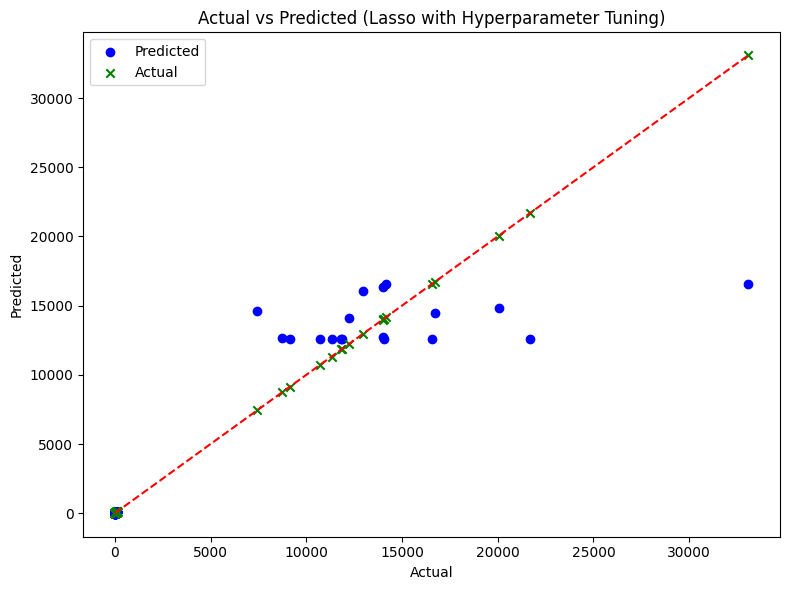

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Predicted values in blue
plt.scatter(y_test, y_test, color='green', label='Actual', marker='x')  # Actual values in green with a different marker
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso with Hyperparameter Tuning)')
plt.legend()
plt.tight_layout()
plt.show()

### With Robustcaler

In [ ]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# Scale the features using RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection (only on training set)
lasso = Lasso(alpha=1.0, random_state=42)

X_test_selected = rfe.transform(X_test_scaled)

lasso.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_scaled = lasso.predict(X_test_scaled)

#Generate predictions on the training set
y_train_pred = lasso.predict(X_train_scaled)

# Evaluation metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Training set evaluation:")
print(f"Mean absolute error: {mae_train:.2f}")
print(f"Mean squared error: {mse_train:.2f}")
print(f"Root mean squared error: {rmse_train:.2f}")
print(f"R2-score: {r2_train:.2f}")

# Make predictions and evaluate on the test set
y_test_pred = lasso.predict(X_test_selected)

# Evaluation metrics for test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Testing set evaluation:")
print(f"Mean absolute error: {mae_test:.2f}")
print(f"Mean squared error: {mse_test:.2f}")
print(f"Root mean squared error: {rmse_test:.2f}")
print(f"R2-score: {r2_test:.2f}")

Training set evaluation:
Mean absolute error: 71.20
Mean squared error: 307895.97
Root mean squared error: 554.88
R2-score: 0.92
Testing set evaluation:
Mean absolute error: 85.91
Mean squared error: 551952.91
Root mean squared error: 742.94
R2-score: 0.88


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


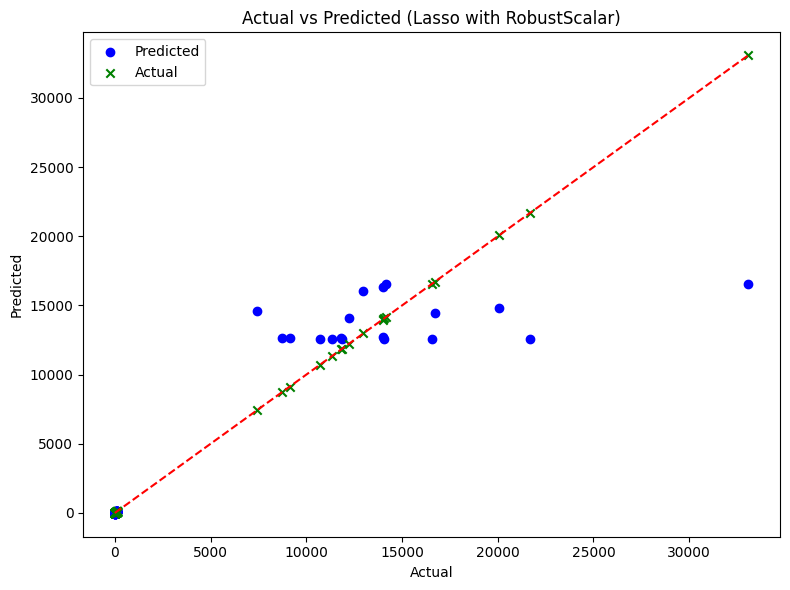

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted')  # Predicted values in blue
plt.scatter(y_test, y_test, color='green', label='Actual', marker='x')  # Actual values in green with a different marker
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso with RobustScalar)')
plt.legend()
plt.tight_layout()
plt.show()

## Random Forest Model

### Baseline Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the training set
y_pred = rf_model.predict(X_train)

#Evaluation metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print("Mean absolute error: %.2f" %mae)
print("(MSE): %.2f" %mse)
print(" (RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 16.86
(MSE): 30458.95
 (RMSE): 174.52
R2-score: 0.99


In [ ]:
## predict with testing set
y_pred = rf_model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean absolute error: %.2f" %mae)
print("(MSE): %.2f" %mse)
print(" (RMSE): %.2f" %rmse)
print("R2-score: %.2f" %r2)

Mean absolute error: 44.08
(MSE): 170777.51
 (RMSE): 413.25
R2-score: 0.96


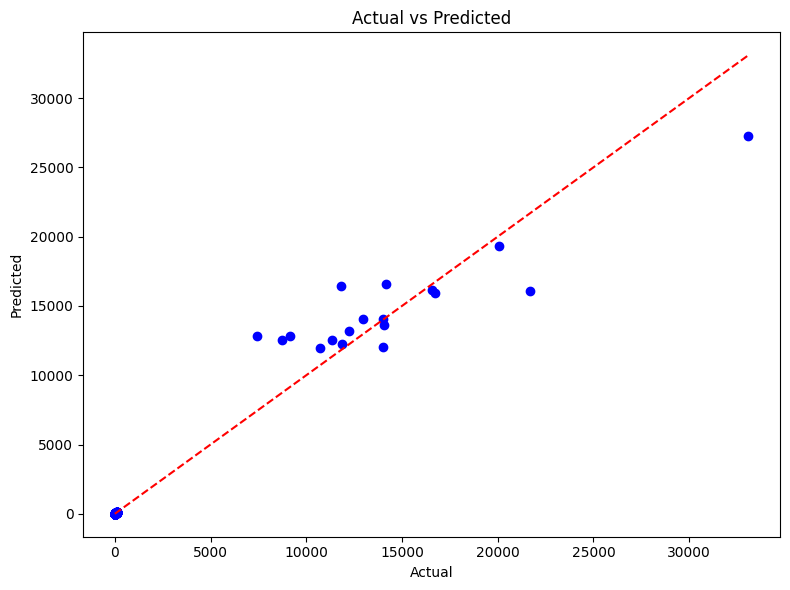

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.tight_layout()
plt.show()